In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import sklearn
torch.manual_seed(2019)
import matplotlib.pyplot as plt 

In [2]:
X_array_1 = pd.read_csv('ArOpt15.csv', header=None).values
Y_array_1 = pd.read_csv('ArOpt15Label.csv', header=None).values.T
# Y_array_1 = Y_array_1/Y_array_1.max()

X_array_2 = pd.read_csv('Ar15.csv', header=None).values
Y_array_2 = pd.read_csv('Ar15Label.csv', header=None).values.T
# Y_array_2 = Y_array_2/Y_array_2.max()

X_array_3 = pd.read_csv('Ar25.csv', header=None).values
Y_array_3 = pd.read_csv('Ar25Label.csv', header=None).values.T
# Y_array_3 = Y_array_3/Y_array_3.max()

X_array_4 = pd.read_csv('ArOpt.csv', header=None).values
Y_array_4 = pd.read_csv('ArOptLabel.csv', header=None).values.T
# Y_array_4 = Y_array_4/Y_array_4.max()


X_array = np.concatenate((X_array_1, X_array_2, X_array_3, X_array_4),axis=0)
Y_array = np.concatenate((Y_array_1, Y_array_2, Y_array_3, Y_array_4),axis=0)
Y_array = Y_array/Y_array.max()
X_array=np.delete(X_array,0,1)

print(X_array.shape,Y_array.shape)
random.seed(2019)
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.2, random_state=1)

x = torch.from_numpy(X_train).float()
y = torch.from_numpy(y_train).float()
xPredicted = torch.from_numpy(X_test).float()
yTestReal = torch.from_numpy(y_test).float()
x, y = Variable(x), Variable(y)

(208, 14) (208, 1)


In [4]:
y_train.shape

(166, 1)

In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
       #  x = F.leaky_relu(self.hidden(x))
       # x = F.leaky_relu(self.hidden(x))
        x = self.predict(x)             # linear output
        return x

In [8]:
#net = Net(n_feature=15, n_hidden=15, n_output=1) 
input_size = 15
hidden_sizes = [8, 5]
output_size = 1
# Build a feed-forward network
net = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.LeakyReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.LeakyReLU(),
                      nn.Linear(hidden_sizes[1], output_size))
print(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.005)
#optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
#loss_func = torch.nn.L1Loss() 

Sequential(
  (0): Linear(in_features=15, out_features=8, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=8, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=1, bias=True)
)


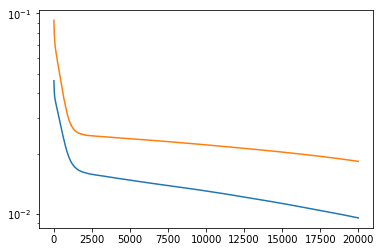

In [26]:
total_epoch = 20000
lost_hist_train = np.zeros([total_epoch])
lost_hist_eval = np.zeros([total_epoch])
net.train()
for t in range(total_epoch):

    prediction = net(x.float())     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    # print(loss.data.numpy())
    lost_hist_train[t] = loss.data.numpy()

    y_predict = net(xPredicted.float())  # input x and predict based on x

    loss_eval = loss_func(y_predict, yTestReal)  # must be (1. nn output, 2. target)

    lost_hist_eval[t] = loss_eval.data.numpy()


t = np.linspace(0,total_epoch,total_epoch)

plt.semilogy()
plt.plot(t,lost_hist_train)
plt.plot(t,lost_hist_eval)
# plt.show()
plt.savefig('process.svg')

net.eval()
prediction = net(x.float())

In [27]:
net.eval()
y_predict= net(xPredicted.float()) 

In [28]:
print(y_predict)
#mse = np.sqrt(((yTestReal.detach().numpy() - y_predict.detach().numpy())**2).mean(axis=0))
mse = sklearn.metrics.mean_squared_error(yTestReal.detach().numpy(),y_predict.detach().numpy())
print(mse)

tensor([[0.5112],
        [0.2673],
        [0.2034],
        [0.6745],
        [0.0371],
        [0.7419],
        [0.1836],
        [0.1675],
        [0.6742],
        [0.0445],
        [0.0237],
        [0.7837],
        [0.0315],
        [0.6272],
        [0.0334],
        [0.3774],
        [0.4468],
        [0.5891],
        [0.7360],
        [0.7281],
        [0.5763],
        [0.0426],
        [0.4832],
        [0.2338],
        [0.1091],
        [0.1783],
        [0.8761],
        [0.8238],
        [0.7449],
        [0.3350],
        [0.2174],
        [0.4957],
        [0.7152],
        [0.3542],
        [0.0361],
        [0.0503],
        [0.7209],
        [0.6277],
        [0.0097],
        [0.0866],
        [0.6199],
        [0.5760]], grad_fn=<AddmmBackward>)
0.018302908


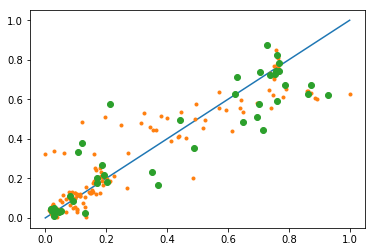

In [29]:
xx = np.linspace(0,1,100)
yy = np.linspace(0,1,100)
plt.clf()
plt.plot(xx,yy)
plt.plot(y.numpy(), prediction.detach().numpy(), '.')
plt.plot(yTestReal.detach().numpy(),y_predict.detach().numpy(), 'o')
# plt.savefig('results.svg')


In [43]:
def computeMSE(Xarray, Y_array, feature):
#     sphere the array
    X_array = sklearn.preprocessing.scale(Xarray)
    X_array[:,feature] = 0
    X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.2, random_state=1)

    x = torch.from_numpy(X_train).float()
    y = torch.from_numpy(y_train).float()
    xPredicted = torch.from_numpy(X_test).float()
    yTestReal = torch.from_numpy(y_test).float()
    x, y = Variable(x), Variable(y)
    
    total_epoch = 20000
    lost_hist_train = np.zeros([total_epoch])
    lost_hist_eval = np.zeros([total_epoch])
    net.train()
    for t in range(total_epoch):

        prediction = net(x.float())     # input x and predict based on x

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        y_predict = net(xPredicted.float())  # input x and predict based on x


        
    mse = sklearn.metrics.mean_squared_error(yTestReal.detach().numpy(),y_predict.detach().numpy())
    return mse

In [44]:
X_array_1 = pd.read_csv('ArOpt15.csv', header=None).values
Y_array_1 = pd.read_csv('ArOpt15Label.csv', header=None).values.T
# Y_array_1 = Y_array_1/Y_array_1.max()

X_array_2 = pd.read_csv('Ar15.csv', header=None).values
Y_array_2 = pd.read_csv('Ar15Label.csv', header=None).values.T
# Y_array_2 = Y_array_2/Y_array_2.max()

X_array_3 = pd.read_csv('Ar25.csv', header=None).values
Y_array_3 = pd.read_csv('Ar25Label.csv', header=None).values.T
# Y_array_3 = Y_array_3/Y_array_3.max()

X_array_4 = pd.read_csv('ArOpt.csv', header=None).values
Y_array_4 = pd.read_csv('ArOptLabel.csv', header=None).values.T
# Y_array_4 = Y_array_4/Y_array_4.max()


X_array = np.concatenate((X_array_1, X_array_2, X_array_3, X_array_4),axis=0)
Y_array = np.concatenate((Y_array_1, Y_array_2, Y_array_3, Y_array_4),axis=0)
Y_array = Y_array/Y_array.max()
X_array=np.delete(X_array,0,1)


In [45]:
computeMSE(X_array,Y_array,0)

0.010440062

In [46]:
mseArray = np.zeros(X_array.shape[1])
for i in range(0, X_array.shape[1]):
    mseArray[i] = computeMSE(X_array,Y_array,i)
    

In [5]:
print(mseArray)
print(np.argsort(regr.feature_importances_))

NameError: name 'mseArray' is not defined